In [32]:
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify

In [2]:
x = sp.Symbol('x')
k = sp.Symbol('k', real = True, positive = True)
psi = sp.Function('psi')
x, k, psi

(x, k, psi)

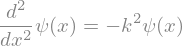

In [8]:
eq = sp.Eq(psi(x).diff(x, x), -k**2*psi(x))
eq

In [9]:
sp.dsolve(eq, psi(x))

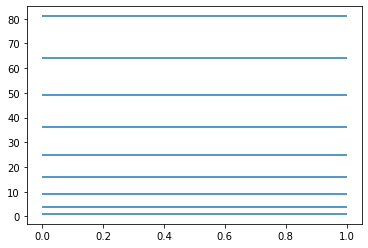

In [12]:
plt.hlines([n**2 for n in range(1, 10)], 0, 1)

$$\int_0^a \sin^2\frac{n \pi}{a}x$$

In [3]:
n = sp.Symbol('n', integer = True, positive = True)
a = sp.Symbol('a', real = True)
x = sp.Symbol('x')
h = sp.Symbol('hbar')
n, a, x, h

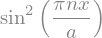

In [16]:
f = sp.sin(n * sp.pi * x / a)**2
f

In [17]:
sp.integrate(f, (x, 0, a))

In [27]:
def Psi(n, x, t, a = 1.0, h = 1.0, m = 1.0):
    return np.sqrt(2.0 / a) * np.sin(n * np.pi * x / a) * np.exp(-1j * n**2 * np.pi**2 * h / (2 * m * a**2) * t)

In [30]:
x = np.linspace(0, 1, 10)
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [31]:
np.sin(x)

array([0.        , 0.11088263, 0.22039774, 0.3271947 , 0.42995636,
       0.52741539, 0.6183698 , 0.70169788, 0.77637192, 0.84147098])

In [39]:
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (-1.5, 1.5))
line1, = ax.plot([], [], lw = 2)
line2, = ax.plot([], [], lw = 2)
dt = 0.001
n = 6
plt.close()

#ffmpeg
xs = np.linspace(0, 1, 100)
def animate(i):
    line1.set_data(xs, np.real(Psi(n, xs, dt * i)))
    line2.set_data(xs, np.imag(Psi(n, xs, dt * i)))
    return line1, line2

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())

In [37]:
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (0, 2))
line1, = ax.plot([], [], lw = 2)
dt = 0.001
n = 2
plt.close()

def animate(i):
    line1.set_data(xs, np.abs(Psi(n, xs, dt * i))**2)
    return line1, 

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())

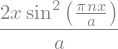

In [41]:
f = x * 2 / a * sp.sin(n * sp.pi * x / a)**2
f

In [42]:
sp.integrate(f, (x, 0, a))

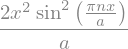

In [43]:
f = x**2 * 2 / a * sp.sin(n * sp.pi * x / a)**2
f

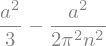

In [45]:
sp.integrate(f, (x, 0, a)).simplifyplify()

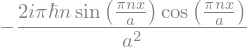

In [53]:
f = -sp.I * h * 2 / a * sp.sin(n * sp.pi * x / a) * sp.sin(n * sp.pi * x / a).diff(x)
f

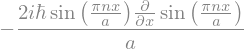

In [57]:
f = -sp.I * h * 2 / a * sp.sin(n * sp.pi * x / a) * sp.Derivative(sp.sin(n * sp.pi * x / a), x)
f

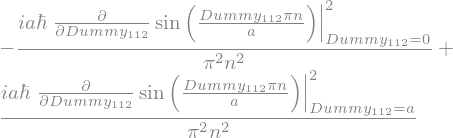

In [58]:
sp.integrate(f, (x, 0, a))

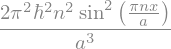

In [55]:
f = -h**2 * 2 / a * sp.sin(n * sp.pi * x / a) * sp.sin(n * sp.pi * x / a).diff(x, x)
f

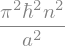

In [56]:
sp.integrate(f, (x, 0, a))

$$(\psi_n, \psi_m)=\int_0^a \sqrt{\frac{2}{a}} \sin \frac{n \pi}{a}x\ \sqrt{\frac{2}{a}} \sin \frac{m \pi}{a} dx$$

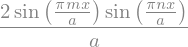

In [6]:
m = sp.Symbol('m', integer = True, positive = True)
f = 2 / a * sp.sin(n * sp.pi * x / a) * sp.sin(m * sp.pi * x / a)
f

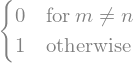

In [7]:
sp.integrate(f, (x, 0, a))

In [17]:
def f(x, y, z):
    print(x, y, z)

In [18]:
x = [1, 2, 3]

In [19]:
f(x[0], x[1], x[2])

TypeError: f() missing 2 required positional arguments: 'y' and 'z'

In [20]:
f(*x)

1 2 3


In [35]:
# {1 : 1, 2 : 1, 3 : 2}
def PsiSum(x, t, cn):
    ys = np.zeros_like(x, dtype = np.complex128)
    norm = np.sqrt(np.sum(np.abs(np.array([*cn.values()]))**2))
    for k, v in cn.items():
        ys += v * Psi(k, x, t) / norm
    return ys

In [24]:
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (0, 6))
line1, = ax.plot([], [], lw = 2)
dt = 0.001
plt.close()

xs = np.linspace(0, 1, 100)
def animate(i):
    line1.set_data(xs, np.abs(PsiSum(xs, dt * i, {1:1, 2:1, 3:1, 4:1, 5:1, 6:1}))**2)
    return line1, 

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())

# RS9

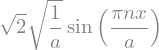

In [4]:
psin = sp.sqrt(2 / a) * sp.sin(n * sp.pi * x / a)
psin

In [5]:
A = sp.Symbol('A')
Psit0 = A * x * (a - x)
Psit0

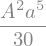

In [6]:
sp.integrate(Psit0 * Psit0, (x, 0, a))

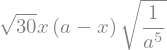

In [8]:
Psit0 = Psit0.subs(A, sp.sqrt(30 / a**5))
Psit0

$$c_n = \int_0^a \psi_n^* \Psi\ dx$$

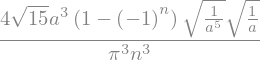

In [11]:
cn = sp.integrate(psin * Psit0, (x, 0, a)).simplify()
cn

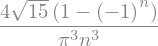

In [13]:
cn = cn.subs(a, 1)
cn

In [17]:
cnf = lambdify(n, cn)

In [19]:
cnf(np.arange(1, 10))

array([0.99927725, 0.        , 0.03701027, 0.        , 0.00799422,
       0.        , 0.00291334, 0.        , 0.00137075])

Text(0, 0.5, '$c_n$')

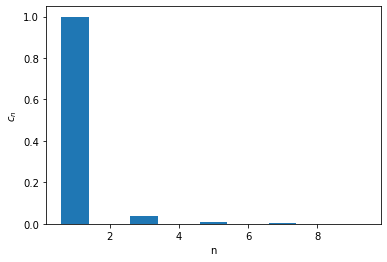

In [24]:
ns = np.arange(1, 10)
plt.bar(ns, cnf(ns))
plt.xlabel('n')
plt.ylabel('$c_n$')

Text(0, 0.5, '$p(E_n)$')

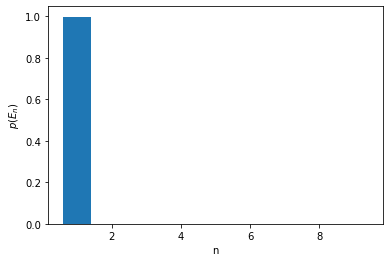

In [25]:
ns = np.arange(1, 10)
plt.bar(ns, np.abs(cnf(ns))**2)
plt.xlabel('n')
plt.ylabel('$p(E_n)$')

In [29]:
l = []
for i in range(10):
    l.append(i * i)
l

In [30]:
[i * i for i in range(10)]

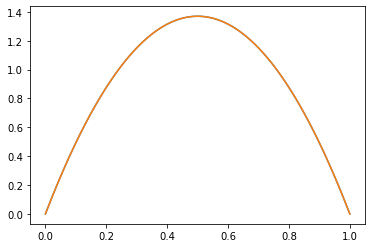

In [44]:
xs = np.linspace(0, 1, 1000)
plt.plot(xs, np.sqrt(30) * xs * (1 - xs))
cn = {n : cnf(n) for n in range(1, 60)}
plt.plot(xs, PsiSum(xs, 0, cn).real)

In [47]:
fig = plt.figure()
ax = plt.axes(xlim = (0, 1), ylim = (0, 3))
line1, = ax.plot([], [], lw = 2)
dt = 0.001
plt.close()

xs = np.linspace(0, 1, 100)
def animate(i):
    line1.set_data(xs, np.abs(PsiSum(xs, dt * i, cn))**2)
    return line1, 

anim = animation.FuncAnimation(fig, animate, frames=800, interval=20, blit=True)
HTML(anim.to_html5_video())

In [2]:
def k1(E, V0, m = 1, h = 1):
    return np.sqrt(-2 * m * E) / h

def k2(E, V0, m = 1, h = 1):
    return np.sqrt(2 * m * (E + V0)) / h

$$k_1 = k_2 \tan k_2 a$$

$$k_1 - k_2 \tan k_2 a = 0$$

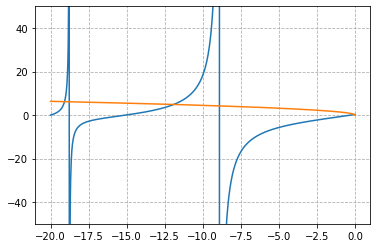

In [15]:
a = 1
V0 = 20
Es = np.linspace(-V0, 0, 1000)
plt.plot(Es, k2(Es, V0) * np.tan(k2(Es, V0) * a))
plt.plot(Es, k1(Es, V0))
plt.ylim(-50, 50)
plt.grid(ls = '--')

<ipython-input-47-13be198c9c2f>:12: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(Es, -k2(Es, V0) * 1 / np.tan(k2(Es, V0) * a))


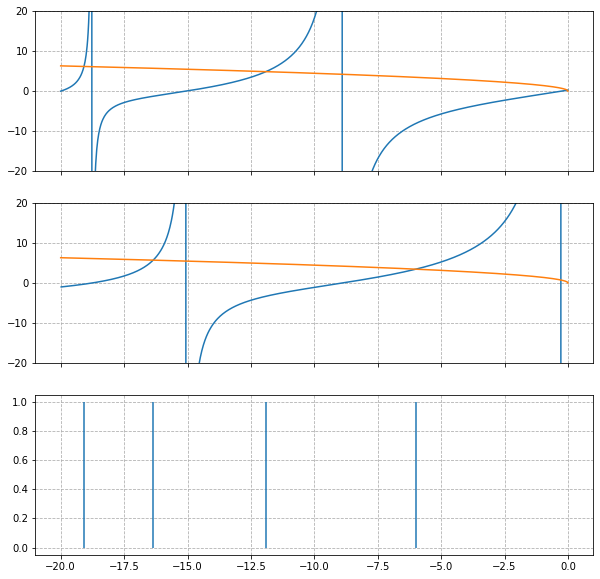

In [47]:
a = 1
V0 = 20
ylim = (-20, 20)
Es = np.linspace(-V0, 0, 1000)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex = True, figsize = (10, 10))
ax1.plot(Es, k2(Es, V0) * np.tan(k2(Es, V0) * a))
ax1.plot(Es, k1(Es, V0))
ax1.set_ylim(*ylim)
ax1.grid(ls = '--')

ax2.plot(Es, -k2(Es, V0) * 1 / np.tan(k2(Es, V0) * a))
ax2.plot(Es, k1(Es, V0))
ax2.set_ylim(*ylim)
ax2.grid(ls = '--')

ax3.grid(ls = '--')
ax3.vlines(E0, 0, 1)
ax3.vlines(E1, 0, 1)
ax3.vlines(E2, 0, 1)
ax3.vlines(E3, 0, 1)

In [39]:
E0 = fsolve(lambda E: k2(E, V0) * np.tan(k2(E, V0) * a) - k1(E, V0), -19)[0]
E0

In [42]:
E1 = fsolve(lambda E: -k2(E, V0) * 1/np.tan(k2(E, V0) * a) - k1(E, V0), -16)[0]
E1

In [44]:
E2 = fsolve(lambda E: k2(E, V0) * np.tan(k2(E, V0) * a) - k1(E, V0), -11)[0]
E2

In [46]:
E3 = fsolve(lambda E: -k2(E, V0) * 1/np.tan(k2(E, V0) * a) - k1(E, V0), -6)[0]
E3

In [53]:
E4 = fsolve(lambda E: k2(E, V0) * np.tan(k2(E, V0) * a) - k1(E, V0), 0.4)[0]
E4

<ipython-input-2-a32c5a886dc5>:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-2 * m * E) / h


In [34]:
f = lambda x: x**2

In [35]:
f(5)

In [77]:
def psi(x, E, V0 = 1, a = 1, A = 1):
    return np.piecewise(x, [x < -a, x > a], [lambda x: A * np.exp(k1(E, V0) * x), lambda x: A * np.exp(-k1(E, V0) * x), lambda x: A * np.exp(-k1(E, V0) * a) * np.cos(k2(E, V0) * x) / np.cos(k2(E, V0) * a)])

In [60]:
def psi(x, E, V0 = 1, a = 1, A = 1):
    return np.piecewise(x, [x < -a, x > a], [lambda x : A * np.exp(k1(E, V0) * x), lambda x : A * np.exp(-k1(E, V0) * x), lambda x : A * np.exp(-k1(E, V0) * a) * np.cos(k2(E, V0) * x) / np.cos(k2(E, V0) * a)])

In [63]:
a

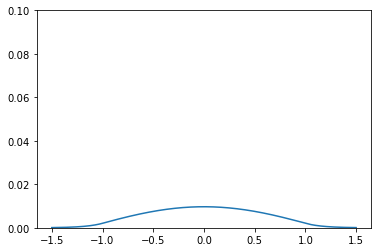

In [78]:
xs = np.linspace(-1.5, 1.5, 1000)
plt.plot(xs, psi(xs, E0, 20))
plt.ylim(0, 0.1)